In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!pip install -q tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import numpy as np
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import cv2


import re
import time
import json
from glob import glob
from PIL import Image
import pickle

from tqdm import tqdm
from __future__ import absolute_import, division, print_function, unicode_literals
import cProfile
tf.compat.v1.enable_eager_execution()

Using TensorFlow backend.


In [5]:
tf.VERSION

'1.15.2'

In [0]:
df = pd.read_csv("/content/drive/My Drive/Memotion /memotion_dataset_7k/labels.csv", header=None, skiprows=1)

In [7]:
print(df.head(5))

   0             1  ...                 7              8
0  0   image_1.jpg  ...  not_motivational  very_positive
1  1  image_2.jpeg  ...      motivational  very_positive
2  2   image_3.JPG  ...  not_motivational       positive
3  3   image_4.png  ...      motivational       positive
4  4   image_5.png  ...  not_motivational        neutral

[5 rows x 9 columns]


In [8]:
image_name = df[1]
image_caption = df[3]
for i in range(0,5):
  print(image_name[i]+ " : "+image_caption[i])

image_1.jpg : LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK imgflip.com
image_2.jpeg : The best of #10 YearChallenge! Completed in less the 4 years. Kudus to @narendramodi ji 8:05 PM - 16 Jan 2019 from Mumbai  India
image_3.JPG : Sam Thorne @Strippin ( Follow Follow Saw everyone posting these 2009 vs 2019 pics so here's mine 6:23 PM - 12 Jan 2019 O 636 Retweets 3 224 LIKES 65 636 3.2K
image_4.png : 10 Year Challenge - Sweet Dee Edition
image_5.png : 10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious 10 Year Challenge Memes | What is #10 Year Challenge?


In [0]:
image_path = "/content/drive/My Drive/Memotion /memotion_dataset_7k/images"
os.chdir(image_path)

In [0]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize_image_with_pad(img, 299, 299)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [0]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', pooling = 'max')
preprocess_for_model = tf.keras.applications.inception_v3.preprocess_input
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [0]:
# Testing for non png values and any error in images. Checks the load image function.
encode_train = (image_name)
count  = 0
for i in range(0,len(encode_train)):
  img,path = load_image(encode_train[i])
  count = count + 1
  if(i%100 == 0):
    print(str(i) + "th entry done...........")
print(count)

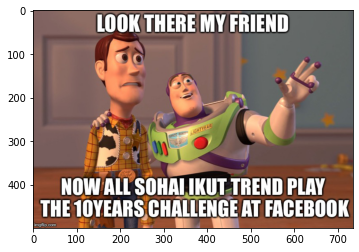

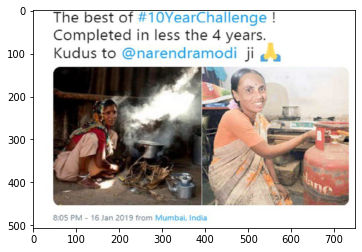

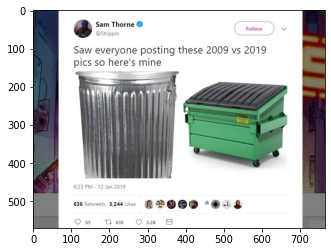

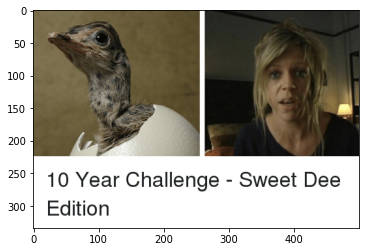

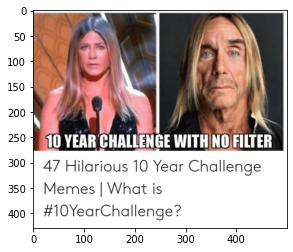

In [13]:
# Visualising certain examples
images = []
for i in range(0,5):
  plt.figure()
  img = mpimg.imread(image_name[i])
  images.append(img)
  plt.imshow(img) 

In [0]:
# Get unique images
encode_train = sorted(set(image_name))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)

  print(np.shape(batch_features))
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save("/content/drive/My Drive/Memotion /resnet_train/"+path_of_feature, bf.numpy())
